# Part 5 - Saving, embedding and exporting the map widget

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Saving-a-web-map" data-toc-modified-id="Saving-a-web-map-1">Saving a web map</a></span></li><li><span><a href="#Updating-a-web-map" data-toc-modified-id="Updating-a-web-map-2">Updating a web map</a></span></li><li><span><a href="#Creating-static-maps-via-take_screenshot" data-toc-modified-id="Creating-static-maps-via-take_screenshot-3">Creating static maps via <code>take_screenshot</code></a></span></li><li><span><a href="#Export-live-map-in-a-separate-HTML-file" data-toc-modified-id="Export-live-map-in-a-separate-HTML-file-4">Export live map in a separate HTML file</a></span></li><li><span><a href="#Embedding-a-live-map" data-toc-modified-id="Embedding-a-live-map-5">Embedding a live map</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

## Saving a web map

Starting with the Python API version 1.3, you can save the map widget as a web map in your `GIS`. This process persists the basemaps, layers added (with or without your custom symbology, including smart mapping), pop-ups, extent, and graphics drawn (with or without custom symbols) as layers in your `web map`.

To save the map, call the `save()` method. This method creates and returns a new `Web Map Item` object. As parameters, you can specify all valid Item properties as shown below:

In [1]:
from arcgis.gis import GIS
#gis = GIS("your_online_profile")
gis=GIS()

In [2]:
world_countries_item = gis.content.get('ac80670eb213440ea5899bbf92a04998')
world_countries_layer = world_countries_item.layers[0]
world_countries_layer

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">


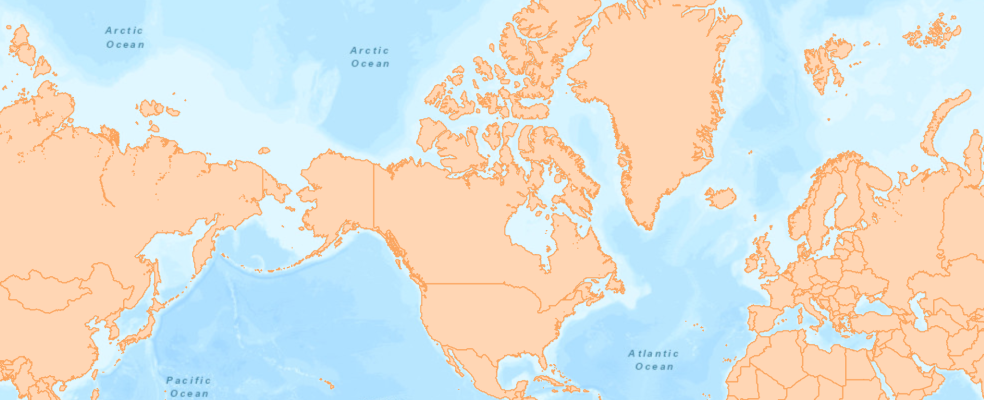

In [5]:
map1 = gis.map("USA")
map1

In [4]:
map1.add_layer(world_countries_layer)

In [5]:
webmap_properties = {'title':'World Countries 2022-01-06 16:33pm',
                     'snippet': 'Jupyter notebook widget saved as a web map',
                     'tags':['automation', 'python']}

webmap_item = map1.save(webmap_properties, thumbnail=r".\webmap_thumbnail.PNG")
print(webmap_item)

<Item title:"World Countries 2022-01-06 16:33pm" type:Web Map owner:arcgis_python>


## Updating a web map

Similarly, if you created the `WebMap` object from an existing web map item, you can call the `update()` method to update it.

Note, the `save()` method always creates a new item with an updated web map definition, so this is a great way to create a copy of an existing web map. For instance, the cell below calls the `save()` method and creates a new web map item with the new set of layers, without disturbing the original web map item.

We can search for web maps just like any other item:

In [14]:
webmap_search = gis.content.search("COVID AND UK", item_type="Web Map", outside_org=True)
covid_map_item = webmap_search[0]

You can also create a WebMap object from an existing web map item by passing the web map item as the parameter to the constructor:

In [13]:
from arcgis.mapping import WebMap

covid_map = WebMap(covid_map_item)
for layer in covid_map.layers:
    print(layer.title)

Coronavirus COVID-19 Cases V2 - Deaths
Coronavirus COVID-19 Cases V2 - Cases
Coronavirus COVID-19 Cases V2 - Cases_country
Coronavirus COVID-19 Cases V2 - Cases_state



You can update a web map by adding or removing layers. For instance, the cell below removes one of the layers from the web map and adds a different layer.

In [50]:
# remove the first - unclassed layer from the map
covid_map.remove_layer(covid_map.layers[1])

In [58]:
covid_map.add_layer(world_countries_layer, options={'title':'World Countries'})

True

In [59]:
for layer in covid_map.layers:
    print(layer.title)

Coronavirus COVID-19 Cases V2 - Deaths
Coronavirus COVID-19 Cases V2 - Cases_country
Coronavirus COVID-19 Cases V2 - Cases_state
World Countries


Next, let's add a layer to the existing `map1` and update the web map item:

In [8]:
from arcgis.features import FeatureLayer
## add layer via
# map1.add_layer(covid_map.layers[6])
## or alternatively
map1.add_layer(FeatureLayer("https://services.arcgis.com/qHLhLQrcvEnxjtPr/arcgis/rest/services/UK_COVID_19_Data/FeatureServer/1"), )

for layer in map1.layers:
    print(layer)

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">
<FeatureLayer url:"https://services.arcgis.com/qHLhLQrcvEnxjtPr/arcgis/rest/services/UK_COVID_19_Data/FeatureServer/1">


In [46]:
from arcgis.features import FeatureLayer
## add layer via
# map1.add_layer(covid_map.layers[6])
## or alternatively
map1.add_layer(FeatureLayer("https://services.arcgis.com/qHLhLQrcvEnxjtPr/arcgis/rest/services/UK_COVID_19_Data/FeatureServer/1"), )

for layer in map1.layers:
    print(layer)

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">
<FeatureLayer url:"https://services.arcgis.com/qHLhLQrcvEnxjtPr/arcgis/rest/services/UK_COVID_19_Data/FeatureServer/1">


Using the `save` method will create a new web map item, while using the `update` method will make updates to the previous web map item:

```
update(mode=None, item_properties=None, thumbnail=None, metadata=None)
```
The `update` method uses the following parameters:

        ---------------     --------------------------------------------------------------------
        item_properties     Optional dictionary. See table below for the keys and values.
        ---------------     --------------------------------------------------------------------
        mode                Optional string. Whether to save this map instance as a 2D WebMap,
                            or a 3D WebScene. Possible strings: ``2D``, ``webmap``, ``3D``, or
                            ``webscene``.
        ---------------     --------------------------------------------------------------------
        thumbnail           Optional string. Either a path or URL to a thumbnail image.
        ---------------     --------------------------------------------------------------------
        metadata            Optional string. Either a path or URL to the metadata.
        ---------------     --------------------------------------------------------------------
        
The `update` method will update the Web Map/Web Scene item that was used to create the `Map Widget` object. In addition, you are also able to update the item's other properties, thumbnail, and metadata.

In [50]:
webmap_item_properties = {'title':'COVID-19 Cases in UK (Updated 2022-01-06)',
                          'snippet':'Map created using Python API showing COVID cases in UK',
                          'tags':['automation', 'world health', 'python']}

new_map_item = map1.update(item_properties = webmap_item_properties, 
                           mode = "2D", thumbnail='./webmap_thumbnail.png')
print(new_map_item)

True


In [52]:
# We can see from the output that the title is being updated:
print(webmap_item)

<Item title:"COVID-19 Cases in UK (Updated 2022-01-06)" type:Web Map owner:arcgis_python>


## Creating static maps via `take_screenshot`

Since version 1.5.2, the ArcGIS API for Python supports the `take_screenshot()` method, which will create a screenshot of the current widget view. Note that the method only works in a Jupyter Notebook environment.
```
take_screenshot(output_in_cell=True, set_as_preview=True, file_path='')
```
The method takes the following arguments:
 - `output_in_cell`: Optional boolean that defaults to True. This will display the screenshot in the output area of the cell where this function is called.  
 - `set_as_preview`: Optional boolean that defaults to True. This will set the screenshot as the static image preview in the cell where the map widget is being displayed. Use this flag if you want the generated HTML previews of your notebook to have a map image visible. 
 - `file_path`: Optional String that defaults to “”. To output the screenshot to a .png file on disk, set this String to a writeable location file path (Ex. file_path = “/path/to/documents/my_screenshot.png”).

In all notebook outputs, each image will be encoded to a base64 data URI and wrapped in an HTML <img> tag. This means that the data for the image lives inside the notebook file itself, allowing for easy sharing of notebooks and generated HTML previews of notebooks.

<div class="alert alert-info">
  <b>Note:</b> This function acts asynchronously, meaning that the Python function will return right away, with the notebook outputs/files being written after an indeterminate amount of time. Avoid calling this function multiple times in a row if the asynchronous portion of the function has not finished yet.
</div>

<div class="alert alert-info">
  <b>Another Note:</b> Some limitations exist for taking screenshots in 2D mode, since the underlying screenshot mechanism is the ArcGIS JS API’s PrintTask object (https://bit.ly/2qRKGJG). If this function fails to create a screenshot, try a slightly different extent and try again. Non-published features with client-side graphics like Spatially Enabled DataFrames might not display in a 2D mode screenshot.
</div>


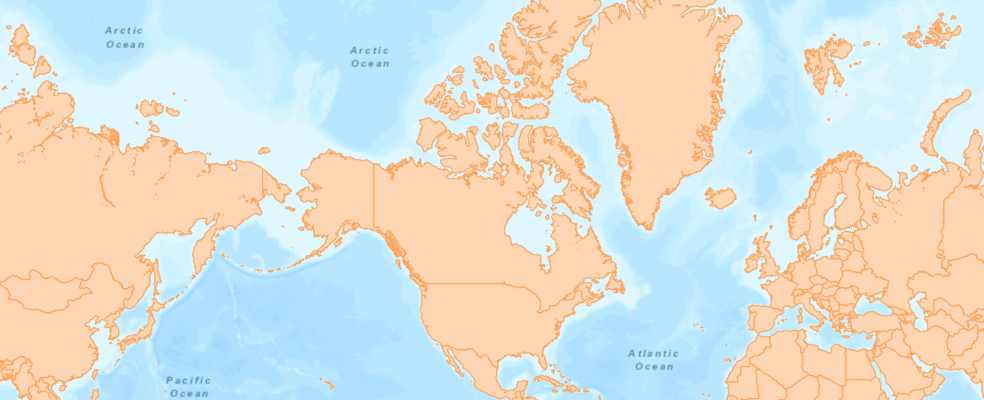

In [6]:
map1.take_screenshot()

## Export live map in a separate HTML file

Another new feature in 1.5.0 is the ability to export the current widget as a stand-alone HTML file. This added functionality provides a new workflow for creating standalone HTML maps that can be shared with anyone. All they need is a web browser!

The cell below will write the current widget to the file specified by a string path. Run the cell, find the file on your disk, and open it in your favorite web browser.

<div class="alert alert-info">
  <b>Note:</b> By default, only publicly accessible layers will show on the exported HTML maps. You must specify that `credentials_prompt=True` to allow users to authenticate to the GIS to view private layers. See the API reference for more information.
</div>

In [90]:
import os

file_dir = os.path.join(os.getcwd(), 'home')
if not os.path.isdir(file_dir):
    os.mkdir(file_dir)
    
file_path = os.path.join(file_dir, 'myWorldMap.html')

map1.export_to_html(file_path)
print("html saved as " + file_path) 

html saved as C:\Users\Username\Documents\home\myWorldMap.html


## Embedding a live map
 
The `embed` method embeds the current state of the map into the underlying notebook as an interactive HTML/JS/CSS element.
```
embed(output_in_cell=True, set_as_preview=True)
```
Its arguments include:
 - `output_in_cell`: Optional boolean that defaults to `True`. This will display the embedded HTML interactive map in the output area of the cell where this function is called.  
 - `set_as_preview`: Optional boolean that defaults to `True`. This will display the embedded HTML interactive map in the cell where the map widget is being displayed. Use this flag if you want the generated HTML previews of your notebook to have an interactive map displayed.


<div class="alert alert-info">
  <b>Note:</b> This element will always display this `snapshot` state of the map, regardless of any future Python code ran.
</div>


In all notebook outputs, each embedded HTML element will contain the entire map state and all relevant HTML wrapped in an `<iframe>` element. This means that the data for the embedded HTML element lives inside the notebook file itself, allowing for easy sharing of notebooks and generated HTML previews of notebooks.


<div class="alert alert-info">
  <b>Note:</b> When this function is called with `set_as_preview = True`, the embedded HTML preview element will overwrite the static image preview from any previous `MapView.take_screenshot(set_as_preview=True)` call.
</div>

<div class="alert alert-info">
  <b>Note:</b> Any embedded maps must only reference publicly available data. The embedded map must also have access to `Unpkg` to load the necessary JavaScript components on the page.
</div>


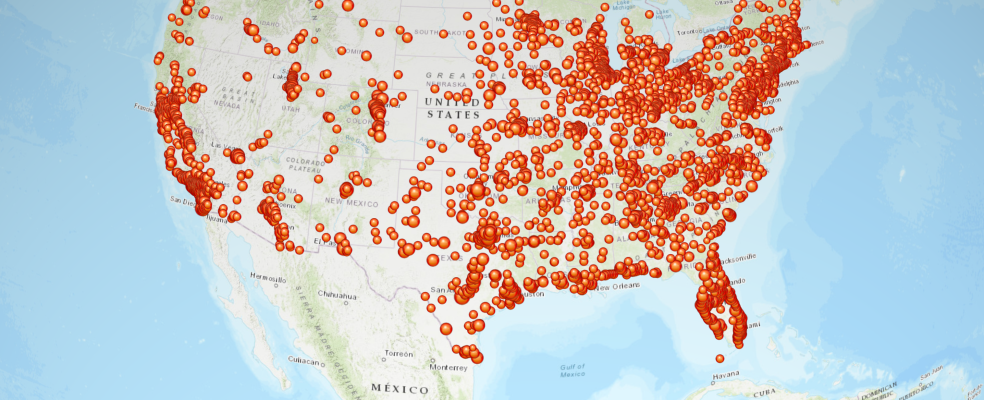

In [100]:
map2 = GIS().map("")
map2

In [11]:
census_item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
census_flayer = census_item.layers[0]

In [12]:
map2.add_layer(census_flayer)

In [ ]:
map2.embed(output_in_cell=True, set_as_preview=True)

## Conclusion

In Part 5 of this guide series, we observed how to consume web maps and web scenes and how to update them. During this process, the examples demonstrated how to modify the map widget using code, how to make copy of an existing item into your account, how to look for basemaps, and how to update layer properties within a web map or web scene. Next in Part 6, we will explore the utility functions to be used with map widgets.

<a href="#Part-5---Saving,-embedding-and-exporting-the-map-widget">Back to Top</a>